In [1]:
import sys
print(sys.version)

3.6.5 (default, Apr  1 2018, 05:46:30) 
[GCC 7.3.0]


# Lab Session #2
## 28/08/2018
___
### Objectives:

#### First, let's disable warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Visualisation

Add a [magic fucntion](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained)

In [3]:
%matplotlib inline

In [4]:
### First step: add packages
import numpy as np
import matplotlib.pyplot as plt

# Step 1. Linear regression

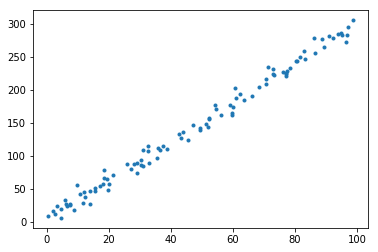

In [5]:
np.random.seed(42) # fix seed for reproducability
x = np.random.uniform(0., 100., 100) # np.random.uniform(low, high, n)
y = 3. * x + 2. + np.random.normal(0., 10., 100) # np.random.normal(mean, sigma, n)
plt.plot(x, y, '.');

Add column of 1's for intercept.

In [6]:
import statsmodels.api as sm
# add constant for intercept
x = sm.add_constant(x)

Use statsmodels implementation of Ordinary Least Squares.

In [7]:
model = sm.OLS(y,x)
res = model.fit()
print(res.params)
print(res.rsquared)

[4.15096158 2.95402268]
0.9895603408417428


Let's now plot the line along with the error (+/- sigma).

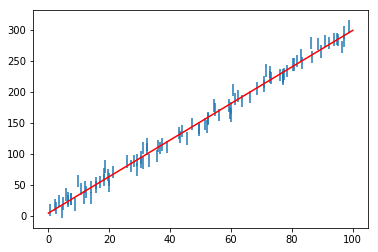

In [8]:
def line(x, a, b):
    return a * x + b
e = np.repeat(10., 100)
plt.errorbar(x[:,1], y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, res.params[1], res.params[0]), 'r-');

### Exercise 1
1. Implement closed formula solution fo the parameters of Linear Regression (from lecture notes). 
1. Implement formula for coefficient of determination (R-squared)

Feel free to use any library, as default - use [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).

Compare results with OLS method.

In [9]:
# here goes your solution for LR parameters
import numpy.linalg as nli
Q = np.dot(np.dot(nli.inv(np.dot(x.transpose(),x)), x.transpose()),y)
print(Q)

[4.15096158 2.95402268]


In [10]:
# here goes your solution for R-squared
SSres = 0
SStot = 0
for i in range(len(x)):
    SSres += np.square(y[i] - (Q[0]+Q[1]*x[i][1]))
    SStot += np.square(y[i] - np.mean(y))
    
print(1 - SSres/SStot)

0.9895603408417428


# Step 2. Data representation and interaction

**Pandas** in an open-source python package that is great for data structuring, preparation and analysis.

Features:
- Unified data representation using *DataFrame* objects - 2D heterogeneous tables with labeled axes;
- Database-like operations: join, union(append), group by, sort, column selection, filtering;
- Advanced operations: pivoting, reshaping, multi-indexing;
- Basic statistics: count, mean, std, min/max, quantiles;
- Vizualization with matplotlib.

## 1. Dataframe creation
Create dataframe by reading a csv file with brain size data (analyzed [here](https://www.researchgate.net/profile/Robert_Schultz2/publication/222881180_In_vivo_brain_size_and_intelligence_Intelligence_15_223-228/links/00b4952d94932772d4000000.pdf)).
The csv contains following columns:
1. Gender: Male or Female
1. FSIQ: Full Scale IQ scores 
1. VIQ: Verbal IQ scores 
1. PIQ: Performance IQ scores 
1. Weight: body weight in pounds
1. Height: height in inches
1. MRI_Count: total pixel Count from the 18 MRI scans

In [11]:
import pandas as pd
data = pd.read_csv('./brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


It is also possible to create dataset from dictionary

In [12]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [13]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## 2. Data exploration
Let's consider simple operations to operate with dataframe.

In [14]:
data.shape

(40, 8)

In [15]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [16]:
data['Gender']

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

You can also use boolean indexing to filter rows. For example to compute the *mean value* of verbal IQ score for females it is possible to use the following line:

In [17]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

To get simple statistics for each column use `descibe` function:

In [18]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


The `groupby` operation allows to split dataframe into groups. 

It returns `GroupBy` object which can be used to apply a function for each group separately ([more](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping) documentation on grouping).

In [19]:
groupby_gender = data.groupby('Gender')
groupby_gender['VIQ'].mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [20]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercise 2
	•	What is the mean value for VIQ for the full population?
	•	How many males/females were included in this study? 
	•	What is the average value of MRI counts expressed in log units, for males and females?
**Hint**: use ‘tab completion’ to find out the methods that can be called, instead of `mean` in the above example.

In [21]:
# print mean VIQ for the full population
print(data['VIQ'].mean())

112.35


In [22]:
# print the numbers of males and females
print(groupby_gender['Gender'].count())

Gender
Female    20
Male      20
Name: Gender, dtype: int64


In [23]:
# print average MRI counts in log units for each gender

print(np.log(groupby_gender.get_group('Male')['MRI_Count']).mean())
print(np.log(groupby_gender.get_group('Female')['MRI_Count']).mean())

13.767731054975144
13.665829512882837


## 3. Data visualization
Let's use pandas plotting to make simple boxplots and 3x3 matrix of scatter plots for 3 columns.

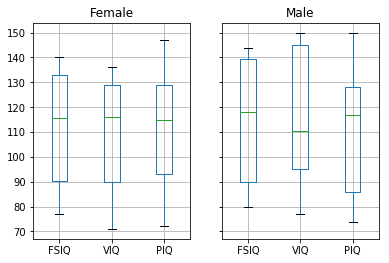

In [24]:
# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

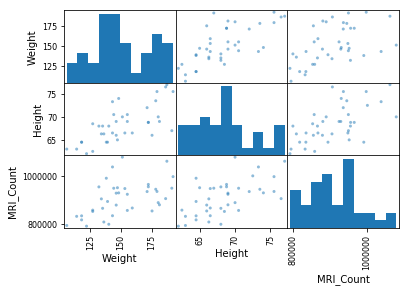

In [25]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

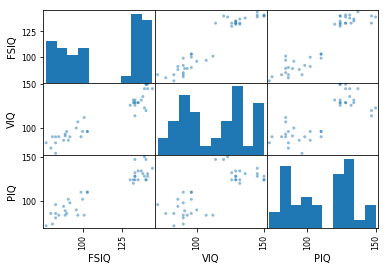

In [26]:
scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ']])
plt.show()

### Exercise 3

Plot the scatter matrix for males only, and for females only. 

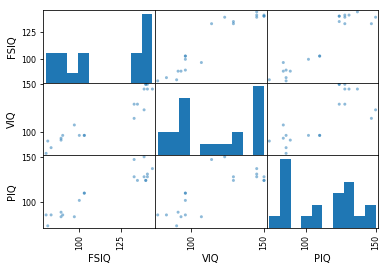

In [27]:
# scatter matrix for males
scatter_matrix(data[data['Gender'] == 'Male'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

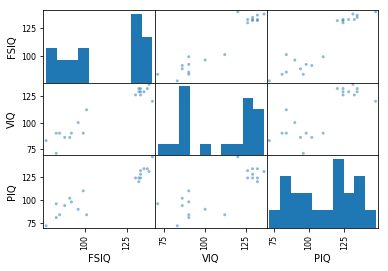

In [28]:
# scatter matrix for females 
scatter_matrix(data[data['Gender'] == 'Female'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

# NEXT SECTION

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

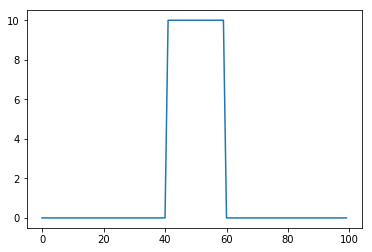

In [29]:
N = 100 # sample count
startX = 40  
endX = 60
x = np.arange(N)
x = ((x < endX) * (x> startX))*10
plt.plot(x);

Let's create a triangular signal.

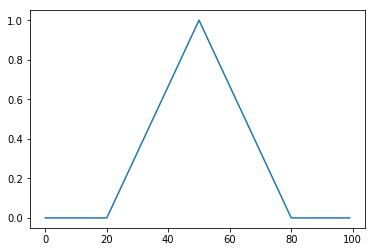

In [30]:
y = np.zeros(100)
heightY = 1.0
startY = 20
endY=80
widthY = (endY-startY)/2.0
for i in range(startY,int(N/2)):
 y[i] =  (i-startY) * (heightY / widthY) 
for i in range(int(N/2),endY):
 y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

Now let's apply two operations on the inputs and compare results.

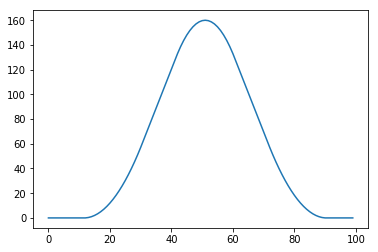

In [31]:
from scipy.signal import convolve
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

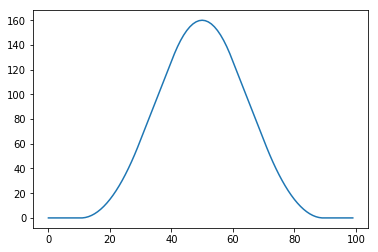

In [32]:
from scipy.signal import correlate
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

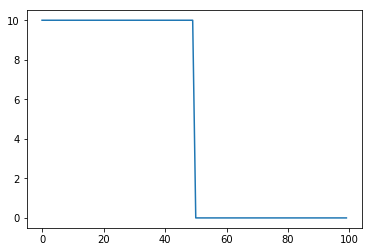

In [33]:
# your code here
N1 = 100
midX = 50  
x1 = np.arange(N1)
x1 = (x1 < midX)*10
plt.plot(x1);

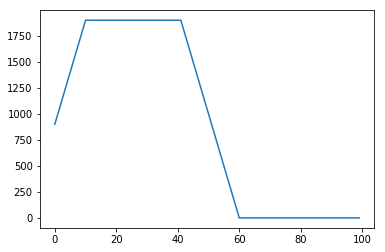

In [34]:
x1_conv = convolve(x,x1,'same')
plt.plot(x1_conv);


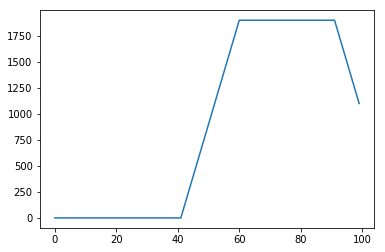

In [35]:
x1_corr = correlate(x,x1,'same')
plt.plot(x1_corr);

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [36]:
%%capture
orig = np.random.uniform(0,10,1200)
h = plt.hist(orig, bins=120, normed=True);
orig = h[0]
t = h[1]
xconv = np.copy(orig)

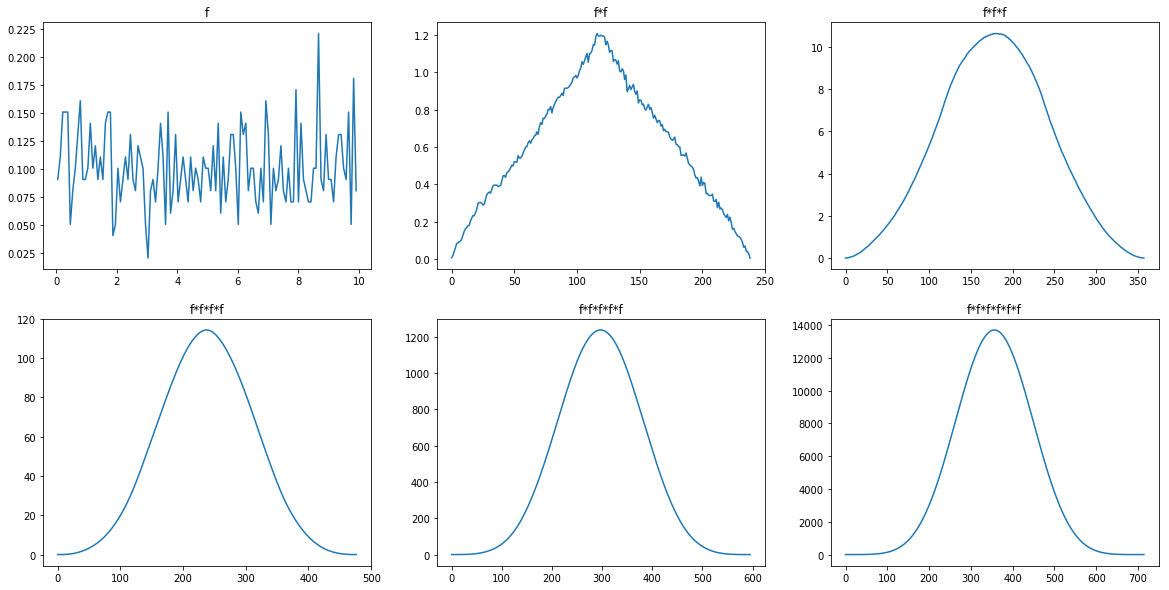

In [37]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig);
for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i+2)
    ax.set_title(("f*"*(i+2))[:-1])
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [38]:
import pandas as pd
data = pd.read_csv('./brain_size.csv', sep=';', na_values=".")
data.fillna(data.mean(), inplace=True)
data.corr()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,0.168519,0.123772,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,0.168519,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,0.123772,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [39]:
data.cov()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,136.666667,-94.051282,-66.666667,-97.500000,45.052632,5.705457,-1.180682e+05
FSIQ,-94.051282,579.946154,538.376923,505.501282,-27.310391,-7.993097,6.225462e+05
VIQ,-66.666667,538.376923,557.720513,412.939744,-38.878543,-6.482117,5.760814e+05
PIQ,-97.500000,505.501282,412.939744,504.948077,1.264507,-6.686325,6.282894e+05
Weight,45.052632,-27.310391,-38.878543,1.264507,522.971660,62.237382,8.297610e+05
Height,5.705457,-7.993097,-6.482117,-6.686325,62.237382,15.548060,1.713821e+05
MRI_Count,-118068.230769,622546.153846,576081.435897,628289.384615,829761.016194,171382.098817,5.224695e+09


As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [40]:
import scipy 
scipy.stats.pearsonr(data['Height'], data['Weight'])[0]

0.6901986843426894

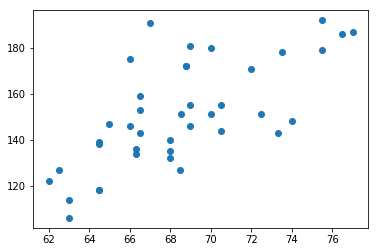

In [41]:
plt.scatter(data['Height'], data['Weight']);

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

In [43]:
# compute demeaned correlation divided by n-1 using scipy.signal
height = data['Height'] #- np.mean(data['Height'])
weight = data['Weight'] #- np.mean(data['Weight'])
corr11 = correlate(height, height,'valid')
corr12 = correlate(height,weight,'valid')
corr21 = correlate(weight, height,'valid')
corr22 = correlate(weight, weight,'valid')
length = (len(data)-1)
print(corr11/length, corr12/length, corr21/length, corr22/length)

[4831.7157302] [10678.62549223] [10678.62549223] [23924.91782087]


In [ ]:
# compute covariance using numpy
print(np.cov(data['Height'], data['Weight']))

### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [ ]:
from math import sqrt
def pearsonr(x, y):
    x = x - x.mean()
    y = y - y.mean()
    sqx = pow(x,2)
    sqy = pow(y,2)
    coeff = sum(x*y)/sqrt(sum(sqx)*sum(sqy))
    tstat = coeff*sqrt((len(x) - 2.)/(1. - pow(coeff, 2)))
    pval = 2 * scipy.stats.t.sf(tstat, len(x) - 2.)
    return coeff, pval

print(pearsonr(data['Height'], data['Weight']))
print(scipy.stats.pearsonr(data['Height'], data['Weight'])[0])
print(scipy.stats.ttest_ind(data['Height'], data['Weight'], equal_var = False))